In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Import Airline passenger traffic data

In [2]:
data = pd.read_csv('airline-passenger-traffic.csv', header=None)
data.columns=['Month', 'Passengers']
data['Month'] = pd.to_datetime(data['Month'], format="%Y-%m")
data = data.set_index('Month')
data.head(12)

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0


In [19]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Import Airline passenger traffic data

data = pd.read_csv('airline-passenger-traffic.csv', header=None)
data.columns=['Month', 'Passengers']
data['Month'] = pd.to_datetime(data['Month'], format="%Y-%m")
data = data.set_index('Month')
data.head(12)

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0


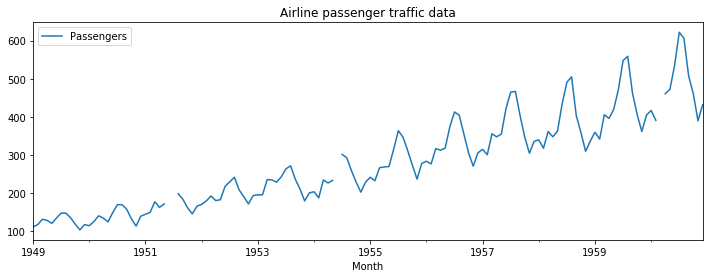

In [4]:
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title("Airline passenger traffic data")
plt.show(block=False)

### Augmented Dickey-Fuller test (ADF) test

In [5]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Passengers'].dropna())
adf_test
print('ADF statistic: %f' % adf_test[0])
print('Critical value @0.05: %.2f' %adf_test[4]['5%'] )
print('p-value: %f' %adf_test[1])

ADF statistic: 1.559556
Critical value @0.05: -2.88
p-value: 0.997731


### KPSS test 

In [6]:
from statsmodels.tsa.stattools import kpss

kpss_test = kpss(data['Passengers'].dropna())

print('KPSS statistic %f' % kpss_test[0])
print('Critical value @ 0.05: %.2f' %kpss_test[3]['5%'])
print('p-value %f' % kpss_test[1])

KPSS statistic 1.024725
Critical value @ 0.05: 0.46
p-value 0.010000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


## Box Cox transformation

In [7]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Passengers'], lmbda=0), index=data.index)
data_boxcox

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Length: 144, dtype: float64

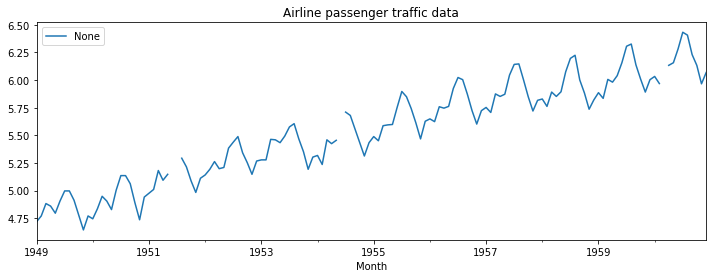

In [8]:
data_boxcox.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title("Airline passenger traffic data")
plt.show(block=False)

variance has become constant

## Differencing

In [9]:
data_boxcox_diff = pd.Series(data_boxcox-data_boxcox.shift(), index=data.index)
data_boxcox_diff

Month
1949-01-01         NaN
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
                ...   
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
Length: 144, dtype: float64

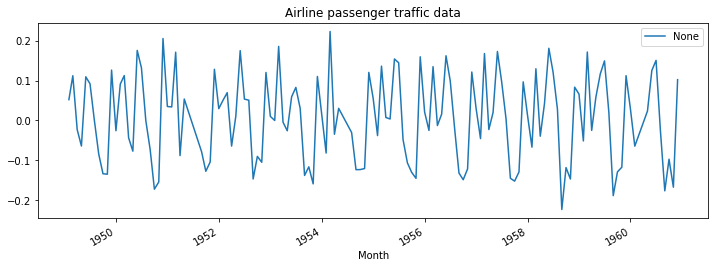

In [10]:
data_boxcox_diff = data_boxcox_diff.dropna()
data_boxcox_diff.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title("Airline passenger traffic data")
plt.show(block=False)


## ADF test

In [11]:
adf_test = adfuller(data_boxcox_diff)
adf_test
print('ADF statistic: %f' % adf_test[0])
print('Critical value @0.05: %.2f' %adf_test[4]['5%'] )
print('p-value: %f' %adf_test[1])

ADF statistic: -4.236150
Critical value @0.05: -2.89
p-value: 0.000572


## Autocorrelation function (ACF) plot

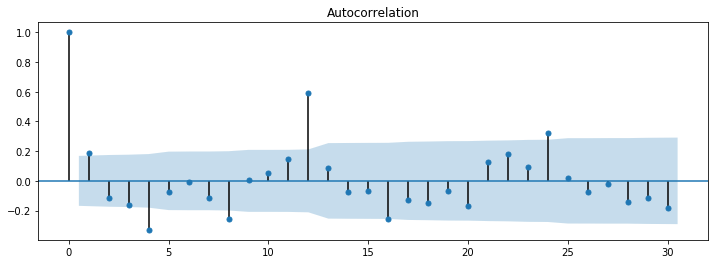

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

## Partial autocorrelation function (PACF) plot

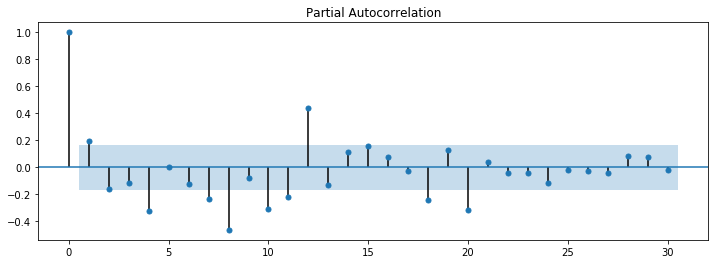

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

## Split into training and test data

In [16]:
data_boxcox_diff.index

DatetimeIndex(['1949-02-01', '1949-03-01', '1949-04-01', '1949-05-01',
               '1949-06-01', '1949-07-01', '1949-08-01', '1949-09-01',
               '1949-10-01', '1949-11-01',
               ...
               '1960-01-01', '1960-02-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=136, freq=None)

In [14]:
train_len = 120
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]

train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

## Auto regression method (AR)

In [17]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order =(1, 0, 0)) # ar(1) model
model_fit = model.fit()
print(model_fit.params)

const      0.007886
ar.L1.y    0.155503
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


const      0.007886 # B0
ar.L1.y    0.155503 # B1

## Recover original series forecast

In [18]:
data_boxcox_diff.index.min(), data_boxcox_diff.index.max()

(Timestamp('1949-02-01 00:00:00'), Timestamp('1960-12-01 00:00:00'))

In [16]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar

Month
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
                ...   
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
Length: 136, dtype: float64

In [20]:
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max()) #predict

KeyError: 'The `end` argument could not be matched to a location related to the index of the data.'

In [ ]:
# recover step by step
y_hat_ar['ar_forecast_boxcox'] =y_hat_ar['ar_forecast_boxcox_diff'].cumsum() # undo the differencing. 
y_hat_ar['ar_forecast_boxcox'] =  y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0]) # add first term that was deleted during differencing
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox']) # reverse of log. 